In [2]:
import pandas as pd
import numpy as np

In [3]:
X = pd.read_csv("../data/forecasts_for_ml/X.csv").values
y = pd.read_csv("../data/forecasts_for_ml/y.csv")
X_final = pd.read_csv("../data/forecasts_for_ml/X_final.csv").values

In [4]:
print(f"note: we have {len(y)} records\n {round(1/6, 3)} we have a class imbalance issue maybe fix ")
y.value_counts() / len(y)
y = y.values

note: we have 272406 records
 0.167 we have a class imbalance issue maybe fix 


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaler.transform(X)

array([[ 1.49555555,  0.14925294, -0.15844484, ..., -1.10711437,
         1.27850699, -1.22946856],
       [-1.50103377,  0.14925294, -0.15844484, ..., -1.10711437,
         1.27850699, -1.22946856],
       [-1.00160222,  0.14925294, -0.15844484, ..., -1.10711437,
         1.27850699, -1.22946856],
       ...,
       [ 0.49669244,  1.08765938,  1.35675318, ...,  0.65661931,
         0.93377665,  0.52207982],
       [ 0.99612399,  1.08765938,  1.35675318, ...,  0.65661931,
         0.93377665,  0.52207982],
       [ 1.49555555,  1.08765938,  1.35675318, ...,  0.65661931,
         0.93377665,  0.52207982]])

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=1)

In [7]:
from xgboost import XGBClassifier

In [8]:
model = XGBClassifier()
model.fit(X_train, y_train)
yhat = model.predict(X_test)
p = model.predict_proba(X_test)
probs_df = pd.DataFrame(p, columns=model.classes_)

/Users/josephdespres/my_env/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/josephdespres/my_env/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
y_test = y_test[:,0]

In [ ]:
yhat = yhat.T

In [ ]:
yhat = yhat[:,]


In [21]:
sum(yhat == y_test) / len(yhat)

0.2887327267483022

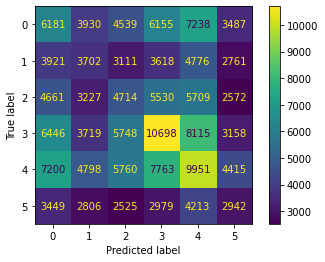

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, yhat)
cmd = ConfusionMatrixDisplay(cm) 
cmd.plot()

In [ ]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=params, scoring='accuracy', 
                   return_train_score=True, verbose=10, cv=3)

In [ ]:
clf.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier()>